### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

## Москва 2022
***

### Вариант №  22

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import tensorflow as tf


# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).



In [2]:
ds = tfds.load("howell", split='train')
data = tfds.as_dataframe(ds)
array = data[['height', 'weight']]
array.head()

,height,weight
0,154.899994,38.200001
1,155.574997,45.529297
2,146.050003,44.763859
3,163.830002,46.776676
4,149.225006,42.127357


# 2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.   


In [25]:
X2 = np.hstack([array['height'].values.reshape(-1,1), array['height'].values.reshape(-1,1)**2, array['height'].values.reshape(-1,1)**3,array['height'].values.reshape(-1,1)**4])
reg2_model = tf.keras.Sequential([tf.keras.Input(shape=(4,)),tf.keras.layers.Dense(units=1)])
reg2_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.3),loss='mean_squared_error')
history = reg2_model.fit(X2, array['weight'], epochs=200, validation_split=0.2)
reg2_model.summary()
y_predict = reg2_model.predict(X2)

Epoch 1/200
14/14 [==============================] - 1s 20ms/step - loss: 52945397592621056.0000 - val_loss: 678075545157632.0000
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 7081112044044288.0000 - val_loss: 6095499727732736.0000
Epoch 3/200
14/14 [==============================] - 0s 9ms/step - loss: 2540626163793920.0000 - val_loss: 737257174597632.0000
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 329715109855232.0000 - val_loss: 239808576225280.0000
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 120786174083072.0000 - val_loss: 7195336900608.0000
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 20785242570752.0000 - val_loss: 20423441907712.0000
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 5511007174656.0000 - val_loss: 3742816534528.0000
Epoch 8/200
14/14 [==============================] - 0s 5ms/step - loss: 1616570744832.0000 - val_loss: 369841078

Epoch 68/200
14/14 [==============================] - 0s 4ms/step - loss: 92898156544.0000 - val_loss: 122435256320.0000
Epoch 69/200
14/14 [==============================] - 0s 4ms/step - loss: 89766346752.0000 - val_loss: 124840271872.0000
Epoch 70/200
14/14 [==============================] - 0s 4ms/step - loss: 90136576000.0000 - val_loss: 146741641216.0000
Epoch 71/200
14/14 [==============================] - 0s 4ms/step - loss: 91242987520.0000 - val_loss: 123076427776.0000
Epoch 72/200
14/14 [==============================] - 0s 6ms/step - loss: 108499869696.0000 - val_loss: 121141485568.0000
Epoch 73/200
14/14 [==============================] - 0s 5ms/step - loss: 101346197504.0000 - val_loss: 126473478144.0000
Epoch 74/200
14/14 [==============================] - 0s 5ms/step - loss: 107019132928.0000 - val_loss: 115434577920.0000
Epoch 75/200
14/14 [==============================] - 0s 4ms/step - loss: 91906875392.0000 - val_loss: 114390990848.0000
Epoch 76/200
14/14 [=========

 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [26]:
mean_squared_error(array['weight'], y_predict)

23228922000.0

# 3. Постройте кривые обучения с зависимостью от количества эпох.

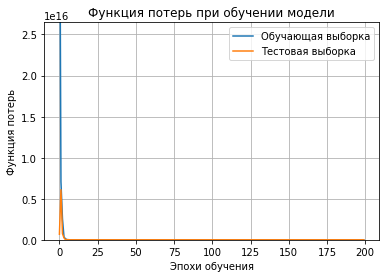

In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)
plot_loss(history)

# 4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.  

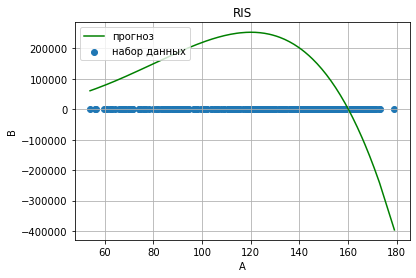

In [28]:
plt.title('RIS')
plt.xlabel('A')
plt.ylabel('B')
plt.scatter(array['height'], array['weight'], label='набор данных')
plt.plot(np.sort(array['height']), reg2_model.predict(X2)[np.argsort(array['height'])], color='green', label='прогноз')
plt.legend(loc='upper left')
plt.grid();

# 5. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании. 

In [32]:
import pandas as pd
import numpy as np

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,height,male,weight
age,1.000000,0.683689,0.005887,0.678335
height,0.683689,1.000000,0.139229,0.940822
male,0.005887,0.139229,1.000000,0.155443
weight,0.678335,0.940822,0.155443,1.000000


# 6. Визуализируйте этот признак в соответствии с индивидуальным заданием. 

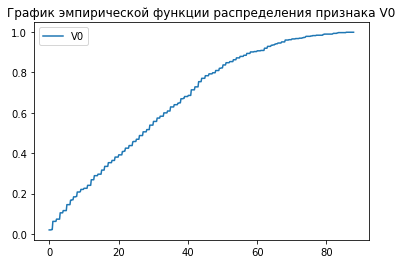

In [36]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)
samples = data['age'] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

df_ECDF = pd.DataFrame(ylist, columns=['V0'],index=xlist)
df_ECDF
df_ECDF.plot.line(title='График эмпирической функции распределения признака V0');

# 7. Сформируйте набор входных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков. 

In [38]:
array2=data[['height', 'age']]
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,)) 
feature_normalizer.adapt(array2)

# 8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. 

In [39]:
large_model = tf.keras.Sequential([feature_normalizer,tf.keras.layers.Dense(units=128, activation='relu'),tf.keras.layers.Dense(units=128, activation='relu'),tf.keras.layers.Dense(units=128, activation='relu'),tf.keras.layers.Dense(units=1)])
large_model.compile(loss='mse')
history = large_model.fit(array2, data['weight'], epochs=100,verbose=1,validation_split = 0.3)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 1312.5510 - val_loss: 993.5806
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 661.1696 - val_loss: 301.2390
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 181.6437 - val_loss: 120.5447
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 89.8029 - val_loss: 71.9630
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 54.5545 - val_loss: 39.6308
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 30.1612 - val_loss: 21.0341
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 21.7869 - val_loss: 16.6040
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 18.9058 - val_loss: 15.1167
Epoch 9/100
12/12 [==============================] - 0s 8ms/step - loss: 17.7897 - val_loss: 14.7594
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 17.7170 -

In [40]:
large_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,540
Trainable params: 33,537
Non-trainable params: 3
__________________________________________________

# 9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

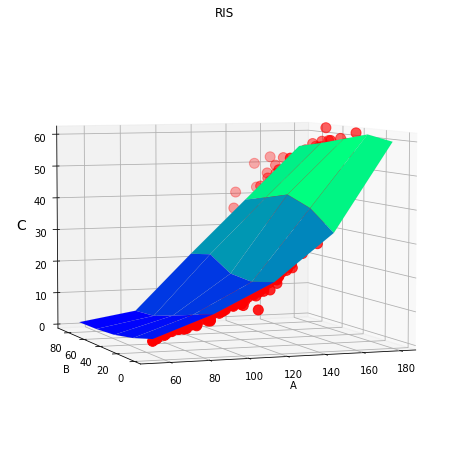

In [53]:
xs = array2.values[:,0]
ys = array2.values[:,1]
zs = data['weight']
n_plot = 5
x_plot = np.linspace(np.min(xs), np.max(xs), n_plot) 
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
z = large_model.predict(xy_2)
z_mesh = z.reshape((n_plot, n_plot))
from matplotlib import cm
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, edgecolors='gray') 
ax.scatter( xs, ys, zs, s=100, c='r' )
plt.title('RIS')
plt.xlabel('A')
plt.ylabel('B')
ax.set_zlabel('C', fontsize=14) 
ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 5, azim = 250)

# 10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 

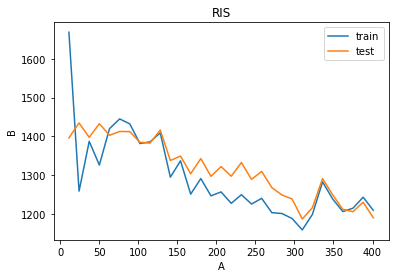

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(array2.values, data['weight'])
train_score = []
test_score = []
for i in range(11, len(X_train), int(len(X_train)/30)):
    large_model = tf.keras.Sequential([
        feature_normalizer,
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mse')
    large_model.fit(X_train[:i], y_train[:i], epochs=10, verbose=0)
    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = large_model.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))
plt.title('RIS')
plt.xlabel('A')
plt.ylabel('B')
plt.plot([i for i in range(11, len(X_train), int(len(X_train)/30))], 
                               train_score, label="train")
plt.plot([i for i in range(11, len(X_train), int(len(X_train)/30))], 
                               test_score, label="test")
plt.legend();